In [298]:
import pandas as pd
import numpy as np

In [299]:
# 2.2 DATA PREPARATION

In [300]:
#Importamos el data set
data = 'https://raw.githubusercontent.com/alexeygrigorev/mlbookcamp-code/master/chapter-02-car-price/data.csv'

In [301]:
#Leemos el data set
df = pd.read_csv(data)
#Normalizamos los nombres de columnas
df.columns = df.columns.str.lower().str.replace(' ', '_')
df.head()
# Vemos los tipos de datos de cada columna
df.dtypes  
# Lista con los nombres de columna que no sean numero (objeto (texto)) para normalizar
strings= list(df.dtypes [df.dtypes == 'object'].index) # Solo nos quedamos con las que son objeto texto para normalizar
strings

['make',
 'model',
 'engine_fuel_type',
 'transmission_type',
 'driven_wheels',
 'market_category',
 'vehicle_size',
 'vehicle_style']

In [302]:
#For para recorrer la lista con los nombres de columna (col toma cada nombre) y transformar cada una
for col in strings:
   df[col] = df[col].str.lower().str.replace(' ', '_') #Aca, col toma el nombre de cada columna y recorre aplicando cambio

In [303]:
df.head()

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,msrp
0,bmw,1_series_m,2011,premium_unleaded_(required),335.0,6.0,manual,rear_wheel_drive,2.0,"factory_tuner,luxury,high-performance",compact,coupe,26,19,3916,46135
1,bmw,1_series,2011,premium_unleaded_(required),300.0,6.0,manual,rear_wheel_drive,2.0,"luxury,performance",compact,convertible,28,19,3916,40650
2,bmw,1_series,2011,premium_unleaded_(required),300.0,6.0,manual,rear_wheel_drive,2.0,"luxury,high-performance",compact,coupe,28,20,3916,36350
3,bmw,1_series,2011,premium_unleaded_(required),230.0,6.0,manual,rear_wheel_drive,2.0,"luxury,performance",compact,coupe,28,18,3916,29450
4,bmw,1_series,2011,premium_unleaded_(required),230.0,6.0,manual,rear_wheel_drive,2.0,luxury,compact,convertible,28,18,3916,34500


In [304]:
#2.3 EXPLORATORY DATA ANALYSIS

In [305]:
# Rerecorremos columnas y obtenemos datos como valores unicos y tipo
df.columns
for col in df.columns:
    print(col)
    print(df[col].unique()[:5])
    print(df[col].nunique())
    print()

make
['bmw' 'audi' 'fiat' 'mercedes-benz' 'chrysler']
48

model
['1_series_m' '1_series' '100' '124_spider' '190-class']
914

year
[2011 2012 2013 1992 1993]
28

engine_fuel_type
['premium_unleaded_(required)' 'regular_unleaded'
 'premium_unleaded_(recommended)' 'flex-fuel_(unleaded/e85)' 'diesel']
10

engine_hp
[335. 300. 230. 320. 172.]
356

engine_cylinders
[ 6.  4.  5.  8. 12.]
9

transmission_type
['manual' 'automatic' 'automated_manual' 'direct_drive' 'unknown']
5

driven_wheels
['rear_wheel_drive' 'front_wheel_drive' 'all_wheel_drive'
 'four_wheel_drive']
4

number_of_doors
[ 2.  4.  3. nan]
3

market_category
['factory_tuner,luxury,high-performance' 'luxury,performance'
 'luxury,high-performance' 'luxury' 'performance']
71

vehicle_size
['compact' 'midsize' 'large']
3

vehicle_style
['coupe' 'convertible' 'sedan' 'wagon' '4dr_hatchback']
16

highway_mpg
[26 28 27 25 24]
59

city_mpg
[19 20 18 17 16]
69

popularity
[3916 3105  819  617 1013]
48

msrp
[46135 40650 36350 29450 345

In [306]:
# Distribucion

In [307]:
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

<Axes: xlabel='msrp', ylabel='Count'>

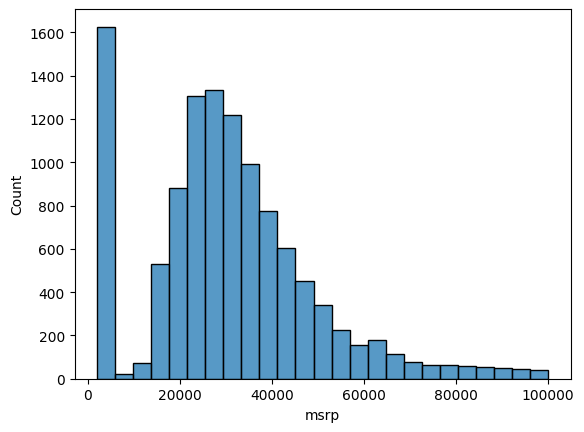

In [308]:
# Graficamos un histograma con los valores de precios
sns.histplot(df.msrp[df.msrp < 100000], bins=25)
# En este caso es una distribucion de cola larga, y con valores atipicos 100 que es el valor minimo pagina
# Comun en ventas, internet y big data

<Axes: xlabel='msrp', ylabel='Count'>

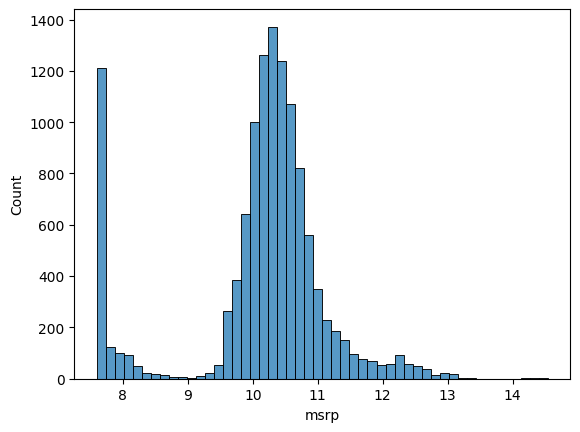

In [309]:
# Aplicamos el log natural a la variable precios
prices_logs = np.log1p(df.msrp)
prices_logs
 # Grafico la distribucion de los valores aplicados el log y vemos que se normaliza
sns.histplot(prices_logs, bins=50) 

In [310]:
# Datos perdidos (nulos)
df.isnull().sum()

make                    0
model                   0
year                    0
engine_fuel_type        3
engine_hp              69
engine_cylinders       30
transmission_type       0
driven_wheels           0
number_of_doors         6
market_category      3742
vehicle_size            0
vehicle_style           0
highway_mpg             0
city_mpg                0
popularity              0
msrp                    0
dtype: int64

In [311]:
# VALIDACION Y FRAMEWORK

In [312]:
#Calculo de tamaño data set y particion
n = len(df)

n_val= int(n * (0.2))
n_test= int(n * (0.2))
n_train= n - n_val - n_test

n_val, n_test, n_train

(2382, 2382, 7150)

In [313]:
# Asignamos a cada data set los valores
df_train = df.iloc[:n_train]
df_val = df.iloc[n_train: n_train + n_val]
df_test = df.iloc[n_train + n_val:]

In [314]:
# Aplicamos esto para mezclar los registros y que el armado sea aleatorio
idx =  np.arange(n)
np.random.seed(2) # se aplica para que no cambien si corremos de vuelta
np.random.shuffle (idx)

df_train = df.iloc [idx[:n_train]]
df_val = df.iloc[idx[n_train: n_train + n_val]]
df_test = df.iloc[idx[n_train + n_val:]]

df_train.head()

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,msrp
2735,chevrolet,cobalt,2008,regular_unleaded,148.0,4.0,manual,front_wheel_drive,2.0,NaN,compact,coupe,33,24,1385,14410
6720,toyota,matrix,2012,regular_unleaded,132.0,4.0,automatic,front_wheel_drive,4.0,hatchback,compact,4dr_hatchback,32,25,2031,19685
5878,subaru,impreza,2016,regular_unleaded,148.0,4.0,automatic,all_wheel_drive,4.0,hatchback,compact,4dr_hatchback,37,28,640,19795
11190,volkswagen,vanagon,1991,regular_unleaded,90.0,4.0,manual,rear_wheel_drive,3.0,NaN,large,passenger_minivan,18,16,873,2000
4554,ford,f-150,2017,flex-fuel_(unleaded/e85),385.0,8.0,automatic,four_wheel_drive,4.0,flex_fuel,large,crew_cab_pickup,21,15,5657,56260


In [315]:
# reseteamos los index para normalizarlo en base al orden aleatorio
df_train = df_train.reset_index(drop = True)
df_val = df_val.reset_index(drop = True)
df_test = df_test.reset_index(drop = True)


In [316]:
# Vector con lso precios normalizados log (resultado) y la borramos del data set para que queden features
y_train = np.log1p(df_train.msrp.values)
y_val = np.log1p(df_val.msrp.values)
y_test = np.log1p(df_test.msrp.values)

del df_train['msrp']
del df_val['msrp']
del df_test['msrp'] 


In [317]:
df_train.columns

Index(['make', 'model', 'year', 'engine_fuel_type', 'engine_hp',
       'engine_cylinders', 'transmission_type', 'driven_wheels',
       'number_of_doors', 'market_category', 'vehicle_size', 'vehicle_style',
       'highway_mpg', 'city_mpg', 'popularity'],
      dtype='object')

In [318]:
# REGRESION LINEAL

In [319]:
##################### NO IMPORTANTE################################################################

In [320]:
df_train

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity
0,chevrolet,cobalt,2008,regular_unleaded,148.0,4.0,manual,front_wheel_drive,2.0,NaN,compact,coupe,33,24,1385
1,toyota,matrix,2012,regular_unleaded,132.0,4.0,automatic,front_wheel_drive,4.0,hatchback,compact,4dr_hatchback,32,25,2031
2,subaru,impreza,2016,regular_unleaded,148.0,4.0,automatic,all_wheel_drive,4.0,hatchback,compact,4dr_hatchback,37,28,640
3,volkswagen,vanagon,1991,regular_unleaded,90.0,4.0,manual,rear_wheel_drive,3.0,NaN,large,passenger_minivan,18,16,873
4,ford,f-150,2017,flex-fuel_(unleaded/e85),385.0,8.0,automatic,four_wheel_drive,4.0,flex_fuel,large,crew_cab_pickup,21,15,5657
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7145,bmw,4_series,2015,premium_unleaded_(required),300.0,6.0,automatic,rear_wheel_drive,2.0,"luxury,performance",midsize,convertible,31,20,3916
7146,volkswagen,beetle,2015,premium_unleaded_(recommended),210.0,4.0,automated_manual,front_wheel_drive,2.0,"hatchback,performance",compact,2dr_hatchback,30,24,873
7147,gmc,sierra_1500,2015,flex-fuel_(unleaded/e85),285.0,6.0,automatic,four_wheel_drive,4.0,flex_fuel,large,extended_cab_pickup,22,17,549
7148,rolls-royce,ghost,2014,premium_unleaded_(required),563.0,12.0,automatic,rear_wheel_drive,4.0,"exotic,luxury,performance",large,sedan,21,13,86


In [321]:
# iloc nos trae los datos datos de elemento con index 10    
df_train.iloc[10]

make                                 rolls-royce
model                     phantom_drophead_coupe
year                                        2015
engine_fuel_type     premium_unleaded_(required)
engine_hp                                  453.0
engine_cylinders                            12.0
transmission_type                      automatic
driven_wheels                   rear_wheel_drive
number_of_doors                              2.0
market_category        exotic,luxury,performance
vehicle_size                               large
vehicle_style                        convertible
highway_mpg                                   19
city_mpg                                      11
popularity                                    86
Name: 10, dtype: object

In [322]:
# Definimos el modleo de regresion lineal donde n son la cantidad de features y w es el peso de cada variable
# linear_regression = Wo + wj*xij (j es la caracteristica y xi el valor para cada elemento)
def linear_regression(xi):
    n = len(xi) 
    pred = w0

    for j in range(n):
        pred = pred + w[j]* xi[j]
    return pred


In [323]:
linear_regression(xi)

np.float64(10.154412092076882)

In [324]:

#Aplicamos porque anteriormetne aplicamos el log (reversa el log) y ese seria el valor del auto
np.expm1(linear_regression(xi)) 

np.float64(25703.261958026484)

In [325]:
# REGRESION LINEAL VECTOR FORM (PRODUCTO ESCALAR)

In [326]:
# Simplificamos lo que viemos anteriormente con un producto escalar de los dos arrays
def dot(xi,w):
    n = len(xi)
    res = 0.0

    for j in range(n):
        res = res + xi[j] * w[j]
    return res

# Definimos la regresion lineal con este prod escalar
def linear_regression(xi):
    return dot(xi,w)

linear_regression(xi)

np.float64(0.18719847967102435)

In [327]:
# Agregamos w0 en los arrays y lo que seria xi0 tiene que ser 1 para poder hacer el prod escalar

w_new = [w0] + w
def linear_regression(xi):
 xi = [1] + xi
 return dot (xi,w_new)

linear_regression (xi)

np.float64(5502.656411490337)

In [328]:
# Vamos a hacer el producto de una matrix que seria X por el vector w peso
#Ejemplo definimos la matrix X
x1 = [1, 148, 24, 1385]
x2 = [1, 132, 25, 2031]
x10 = [1, 453, 11, 86]

X = [x1,x2,x10]
X= np.array(X) # con Numpy acomodamos la matriz
X
#El vector w_new lo mantenemos ocmo antes

array([[   1,  148,   24, 1385],
       [   1,  132,   25, 2031],
       [   1,  453,   11,   86]])

In [329]:
# Definimos la LR resultado de producto escalar entre X matrix y w vector
def linear_regression(X):
    return X.dot(w_new)
linear_regression(X)

ValueError: shapes (3,4) and (5,) not aligned: 4 (dim 1) != 5 (dim 0)

In [ ]:
#############################################################################################################

In [ ]:
# ENTRENAMIENTO MODELO REGRESION LINEAL

In [ ]:
def train_linear_regression(X,y):
    pass

In [ ]:
#Armamos una nueva matriz
X = [
    [  148,   24, 1385],
    [  132,   25, 2031],
    [  453,   11,   86],
    [  158,   24, 185],
    [  172,   25, 201],
    [  413,   11,   86],
    [  38,   54, 185],
    [  142,   25, 431],
    [  453,   31,   86]
]
X = np.array(X)
X
# Creamos una y
y = [100,200,150, 250, 100, 200, 150, 250,120]
# Le agrego una column a con 1 a la matriz
#ones = np.ones(X.shape[0])
#X = np.column_stack([ones,X])
X

array([[ 148,   24, 1385],
       [ 132,   25, 2031],
       [ 453,   11,   86],
       [ 158,   24,  185],
       [ 172,   25,  201],
       [ 413,   11,   86],
       [  38,   54,  185],
       [ 142,   25,  431],
       [ 453,   31,   86]])

In [ ]:
# Calculamos la matriz de Gram Xt
XTX = X.T.dot(X)
# Obtenemos la invesa de esa matrix
XTX_INV = np.linalg.inv(XTX )
# Producto escalar de ambas matrices para obtener el peso y lo multiplicamos por y para tener $ precio
w_full= XTX_INV.dot(X.T).dot(y)
w0 = w_full[0]
w  = w_full[1:]
w0, w

(np.float64(300.06776692555627),
 array([-0.22774253, -2.5769413 , -0.02301206]))

In [ ]:
##################################IMPORTANTE#########################################
# Ponemos todo en una funcion que es lo que vamos a usar para obetner el peso
def train_linear_regression(X,y):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones,X])

    XTX = X.T.dot(X)
    XTX_INV = np.linalg.inv(XTX )
    w_full = XTX_INV.dot(X.T).dot(y)
    return w_full[0], w_full[1:]


ValueError: shapes (6,7150) and (9,) not aligned: 7150 (dim 1) != 9 (dim 0)

In [ ]:
# MODELO PRCIOS AUTOS

In [ ]:
df_train.dtypes

make                  object
model                 object
year                   int64
engine_fuel_type      object
engine_hp            float64
engine_cylinders     float64
transmission_type     object
driven_wheels         object
number_of_doors      float64
market_category       object
vehicle_size          object
vehicle_style         object
highway_mpg            int64
city_mpg               int64
popularity             int64
msrp                   int64
dtype: object

In [ ]:
# Nos quedamos con algunas columnas numericas
base = ['engine_hp', 'engine_cylinders', 'highway_mpg',
        'city_mpg', 'popularity']

#X_train = df_train[base].fillna(0).values
#Armamos funcion para preparar la X
def prepare_X(df):
    df_num = df[base]
    df_num = df_num.fillna(0)
    X = df_num.values
    return X

X_train = prepare_X(df_train)
w0, w = train_linear_regression(X_train, y_train) # Aplicamos modelo y obtenemos los pesos
#Armamos la y prediccion
y_pred = w0 + X_train.dot(w)
y_pred
w0

np.float64(7.927257388070037)

<Axes: ylabel='Count'>

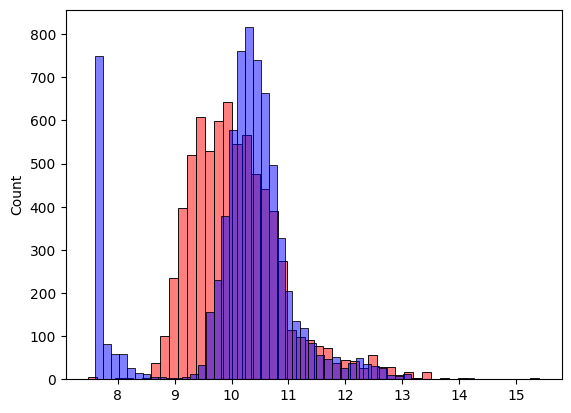

In [334]:
# Graficamos un histograma con 'y target' y con 'y predicciones'
sns.histplot(y_pred, color="red", alpha=0.5, bins=50)
sns.histplot(y_train, color="blue",alpha=0.5, bins=50)
# Necesitamos otra forma de evaluar para ver si esta bien o no

In [ ]:
# RMSE Error Cuadratico Medio


In [ ]:
#definimos la funcion error cuadrado medio
def rmse(y, y_pred):
    se = ( y_pred - y) ** 2 # elevamos al cuadrado las diferencias
    mse = se.mean() # promedio (suma divido la cantidad m)
    return np.sqrt(mse) # raiz cuadrada

rmse(y_train, y_pred)

np.float64(0.7554192603920132)

In [ ]:
# VALIDACION DEL MODELO


In [ ]:
# Ingenieria de features
# En este caso tomamos la antiguedad del auto (mas años mas barato e inversa)
LY = df_train.year.max()
LY - df_train.year
# Lo aplico a la funcion prepare_x

In [ ]:
base = ['engine_hp', 'engine_cylinders', 'highway_mpg', 'city_mpg', 'popularity']

def prepare_X(df):
    df = df.copy()
    df['age'] = (df.year.max()) - (df.year) # Creamos una nueva feature Age que se agrega al data set
    features = base + ['age'] # Age en la base
    df_num = df[features]
    df_num = df_num.fillna(0)
    X = df_num.values
    return X


array([[1.480e+02, 4.000e+00, 3.300e+01, 2.400e+01, 1.385e+03, 9.000e+00],
       [1.320e+02, 4.000e+00, 3.200e+01, 2.500e+01, 2.031e+03, 5.000e+00],
       [1.480e+02, 4.000e+00, 3.700e+01, 2.800e+01, 6.400e+02, 1.000e+00],
       ...,
       [2.850e+02, 6.000e+00, 2.200e+01, 1.700e+01, 5.490e+02, 2.000e+00],
       [5.630e+02, 1.200e+01, 2.100e+01, 1.300e+01, 8.600e+01, 3.000e+00],
       [2.000e+02, 4.000e+00, 3.100e+01, 2.200e+01, 8.730e+02, 0.000e+00]],
      shape=(7150, 6))

In [ ]:
X_train = prepare_X(df_train)
w0, w = train_linear_regression(X_train, y_train)

X_val = prepare_X(df_val)
y_pred = w0 + X_val.dot(w)

rmse(y_val,y_pred) # al agregar una variable mejora el error

np.float64(0.5172055461058327)

<Axes: ylabel='Count'>

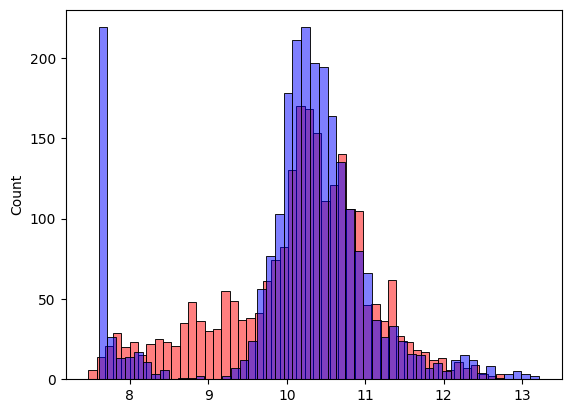

In [ ]:
sns.histplot(y_pred, color="red", alpha=0.5, bins=50)
sns.histplot(y_val, color="blue",alpha=0.5, bins=50)